# Week 7 Dimensionality, Reduction, and Feature Selection

## Part 1) PCA and Variance Threshold in a Linear Regression

***Instructions)***

1. Import the housing data as a data frame and ensure that the data is loaded properly.
2. Drop the "Id" column and any features that are missing more than 40% of their values.
3. For numerical columns, fill in any missing data with the median value.
4. For categorical columns, fill in any missing data with the most common value (mode).
5. Convert the categorical columns to dummy variables.
6. Split the data into a training and test set, where the SalePrice column is the target.
7. Run a linear regression and report the R2-value and RMSE on the test set.
8. Fit and transform the training features with a PCA so that 90% of the variance is retained (see section 9.1 in the Machine Learning with Python Cookbook).
9. How many features are in the PCA-transformed matrix?
10. Transform but DO NOT fit the test features with the same PCA.
11. Repeat step 7 with your PCA transformed data.
12. Take your original training features (from step 6) and apply a min-max scaler to them.
13. Find the min-max scaled features in your training set that have a variance above 0.1 (see Section 10.1 in the Machine Learning with Python Cookbook).
14. Transform but DO NOT fit the test features with the same steps applied in steps 11 and 12.
15. Repeat step 7 with the high variance data.
16. Summarize your findings.

***Answer)***

**#1. Import the data**

In [ ]:
# Load necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Read the dataset as a csv
file_location = 'C:/Users/ivan2/gitLocal/DSC550-WINTER2023/Week7-house-prices-advanced-regression-techniques/train.csv'
git_raw_url = 'https://raw.githubusercontent.com/ivanrdz231r/DSC550-WINTER2023/main/Week7-house-prices-advanced-regression-techniques/train.csv'

df_train = pd.read_csv(git_raw_url)

df_train.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
df_train.shape

(1460, 81)

**#2 Drop the "Id" column and any features that are missing more than 40% of their values.**

Drop the Id column.

In [ ]:
# drop the Id column.
df_train.drop(columns='Id', inplace=True)

# check
df_train.shape

(1460, 80)

Drop features missing 40% or more of their values

In [ ]:
# identifying features missing 40% of their values

# column counts for NaN
na_counts = (df_train.isnull()).sum()

# column counts for non-NaN
non_na_counts = df_train.count()

# total column counts
all_counts = na_counts + non_na_counts

# Calculate the % of 'NA' counts to total counts
na_prct = na_counts / all_counts

# Print the ratio
print(na_prct.sort_values(ascending=False))

PoolQC         0.995205
MiscFeature    0.963014
Alley          0.937671
Fence          0.807534
FireplaceQu    0.472603
                 ...   
Heating        0.000000
HeatingQC      0.000000
MSZoning       0.000000
1stFlrSF       0.000000
SalePrice      0.000000
Length: 80, dtype: float64


In [ ]:
# columns with a NaN % higher than 40
columns_to_drop = na_prct[na_prct > .40].index

print(columns_to_drop)

Index(['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], dtype='object')


In [ ]:
# dropping columns
df_trainV2 = df_train.drop(columns=columns_to_drop)
df_trainV2.shape

(1460, 75)

**#3. For numerical columns, fill in any missing data with the median value.**

In [ ]:
# checking data types
df_trainV2.dtypes.unique()

array([dtype('int64'), dtype('O'), dtype('float64')], dtype=object)

In [ ]:
# checking NaN values of number data types
df_trainV2.select_dtypes(include=['int64', 'float64']).isnull().sum()

MSSubClass         0
LotFrontage      259
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         8
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       81
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
SalePrice          0
dtype: int64

In [ ]:
# funtion to fill NaN will median value of the numerical columns only
def fill_numerical_with_median(df):
    for column in df.columns:
        # check if the column is numerical int or float
        if df[column].dtype == 'int64' or df[column].dtype == 'float64':
            median_value = df[column].median()
            df[column] = df[column].fillna(median_value)
    return df


In [ ]:
# creating a df copy for consistancy
df_trainV3 = df_trainV2.copy()

# applying the function
df_trainV3 = fill_numerical_with_median(df_trainV2)

In [ ]:
# confirming that NaN values have been filled
df_trainV3.select_dtypes(include=['int64', 'float64']).isna().sum()

MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
SalePrice        0
dtype: int64

In [ ]:
df_trainV3.shape

(1460, 75)

**#4. For categorical columns, fill in any missing data with the most common value (mode).**

In [ ]:
# checking NaN values of object data types
df_trainV3.select_dtypes(include=['object']).isnull().sum()

MSZoning          0
Street            0
LotShape          0
LandContour       0
Utilities         0
LotConfig         0
LandSlope         0
Neighborhood      0
Condition1        0
Condition2        0
BldgType          0
HouseStyle        0
RoofStyle         0
RoofMatl          0
Exterior1st       0
Exterior2nd       0
MasVnrType        8
ExterQual         0
ExterCond         0
Foundation        0
BsmtQual         37
BsmtCond         37
BsmtExposure     38
BsmtFinType1     37
BsmtFinType2     38
Heating           0
HeatingQC         0
CentralAir        0
Electrical        1
KitchenQual       0
Functional        0
GarageType       81
GarageFinish     81
GarageQual       81
GarageCond       81
PavedDrive        0
SaleType          0
SaleCondition     0
dtype: int64

In [ ]:
# funtion to fill categorical (object) NaN will mode value
def fill_categorical_with_mode(df):
    for column in df.columns:
        # check if the column is categorical object
        if df[column].dtype == 'object':
            mode_value = df[column].mode()[0]
            df[column] = df[column].fillna(mode_value)
    return df

In [ ]:
# applying the function
df_trainV3 = fill_categorical_with_mode(df_trainV3)

In [ ]:
# confirming NaN values of object data types
df_trainV3.select_dtypes(include=['object']).isnull().sum()

MSZoning         0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
KitchenQual      0
Functional       0
GarageType       0
GarageFinish     0
GarageQual       0
GarageCond       0
PavedDrive       0
SaleType         0
SaleCondition    0
dtype: int64

In [ ]:
df_trainV3.shape

(1460, 75)

**#5. Convert the categorical columns to dummy variables.**

In [ ]:
# creating a df copy for consistancy
df_trainV4 = df_trainV3.copy()

In [ ]:
# Select categorical columns
categorical_cols = df_trainV4.columns[df_trainV4.dtypes == 'object']

# Convert categorical columns to dummy variables
dummy_vars = pd.get_dummies(df_trainV4[categorical_cols])

In [ ]:
# Concatenate dummy variables with the original DataFrame
# Drop the original categorical columns to avoid redundancy
df_trainV4 = pd.concat([df_trainV4.drop(categorical_cols, axis=1), dummy_vars], axis=1)

In [ ]:
# check
# using one-hot-encoding will create an indicator column for each unique category in a category feature.
df_trainV4.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,0,0,1,0,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,0,0,0,1,0,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,0,0,1,0,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,0,0,1,1,0,0,0,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,0,0,0,1,0,0,0,0,1,0


**#6. Split the data into a training and test set, where the SalePrice column is the target.**

In [ ]:
from sklearn.model_selection import train_test_split

# seperate features and target
X = df_trainV4.drop('SalePrice', axis=1) # features
y = df_trainV4['SalePrice'] # target

In [ ]:
# split the data into traininga and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

**#7. Run a linear regression and report the R2-value and RMSE on the test set.**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:
# Create a linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate R^2 value
r2 = model.score(X_test, y_test)

# Calculate RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)

# Print the results
print(f"R^2 value: {r2}")
print(f"RMSE: {rmse}")

R^2 value: 0.38144010941578854
RMSE: 54510.546916179905


**#8. Fit and transform the training features with a PCA so that 90% of the variance is retained (see section 9.1 in the Machine Learning with Python Cookbook).**

In [ ]:
from sklearn.decomposition import PCA

# Initialize PCA to retain 90% of the variance
pca = PCA(n_components=0.90)

# Fit PCA on the training features
pca.fit(X_train)

# Transform the training features
X_train_pca = pca.transform(X_train)

# X_train_pca are now the transformed features

**#9. How many features are in the PCA-transformed matrix?**

In [ ]:
num_features = X_train_pca.shape[1]
print(f"Number of features in the PCA-transformed matrix: {num_features}")

Number of features in the PCA-transformed matrix: 1


**#10. Transform but DO NOT fit the test features with the same PCA.**

In [ ]:
# Assuming your PCA model is named 'pca' and your test features are in 'X_test'
X_test_pca = pca.transform(X_test)

# Now, X_test_pca contains the PCA-transformed test features

**#11 Repeat step 7 with your PCA transformed data.**

In [ ]:
# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train_pca, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_pca)

# Calculate R^2 value
r2_score = model.score(X_test_pca, y_test)

# Calculate RMSE
rmse_score = mean_squared_error(y_test, y_pred, squared=False)

# Print the results
print(f"R^2 value: {r2_score}")
print(f"RMSE: {rmse_score}")

R^2 value: 0.057602536202098764
RMSE: 67283.21202065494


**#12 Take your original training features (from step 6) and apply a min-max scaler to them.**

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the Min-Max scaler
scaler = MinMaxScaler()

# Fit the scaler on the training data
scaler.fit(X_train)

# Transform the training data
X_train_scaled = scaler.transform(X_train)

# Optionally, transform the test data
# X_test_scaled = scaler.transform(X_test)

**#13. Find the min-max scaled features in your training set that have a variance above 0.1 (see Section 10.1 in the Machine Learning with Python Cookbook).**

In [ ]:
# Make sure to use the correct column names if you have them
df_scaled = pd.DataFrame(X_train_scaled)

# Calculate variance for each feature
variances = df_scaled.var()

# Filter features with variance above 0.1
features_high_variance = variances[variances > 0.1].index.tolist()

print("Features with variance above 0.1:", features_high_variance)

Features with variance above 0.1: [6, 35, 39, 40, 43, 46, 53, 57, 73, 88, 103, 110, 113, 117, 119, 136, 138, 142, 143, 151, 153, 158, 159, 162, 163, 167, 168, 173, 175, 176, 182, 183, 188, 191, 192, 194, 197, 203, 210, 212, 214, 224, 225, 234, 238, 239, 240, 241, 263, 268]


**#14. Transform but DO NOT fit the test features with the same steps applied in steps 11 and 12.**

I don't understand this task. Step 11 refers to Step 7. Are we supposed to run a linear regression, and then apply a min-max scaler?

In [ ]:
# transform the test data
X_test_scaled = scaler.transform(X_test)


**#15. Repeat step 7 with the high variance data.**

In [ ]:
# Convert X_train_scaled and X_test_scaled back to DataFrames if they are not already
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)

# Subset the training and test data to include only the high variance features
# Ensure to use the column names for subsetting
high_variance_feature_names = X_train.columns[features_high_variance]
X_train_high_variance = X_train_scaled_df[high_variance_feature_names]
X_test_high_variance = X_test_scaled_df[high_variance_feature_names]

# Create the linear regression model
model_high_variance = LinearRegression()

# Train the model
model_high_variance.fit(X_train_high_variance, y_train)

# Make predictions on the high variance test set
y_pred_high_variance = model_high_variance.predict(X_test_high_variance)

# Calculate R2 and RMSE
r2_high_variance = model_high_variance.score(X_test_high_variance, y_test)
rmse_high_variance = mean_squared_error(y_test, y_pred_high_variance, squared=False)

print(f'R2 value with high variance data: {r2_high_variance}')
print(f'RMSE with high variance data: {rmse_high_variance}')

R2 value with high variance data: 0.5128860700537113
RMSE with high variance data: 48373.21318079802


**#16. Summarize your findings**

The initial linear regression model provides a baseline for comparison. The application of PCA, while reducing dimensionality significantly, resulted in a lower R^2 and higher RMSE.

Selecting features based on high variance proved to be an effective strategy, and improved both R^2 and RMSE. This suggests that these features are more predictive of SalePrice.

This analysis highlights the importance of feature selection in building predictive models. While PCA can be a powerful tool for dimensionality reduction, it's crucial to balance the loss of information against the simplicity of the model. In this case, directly selecting high variance features yielded the best results.

## Part 2) Categorical Feature Selection

***Instructions)***

Download the data from this link Mushroom Classification. Based on several categorical features, you will predict whether or not a mushroom is edible or poisonous.:

1. Import the data as a data frame and ensure it is loaded correctly.
2. Convert the categorical features (all of them) to dummy variables.
3. Split the data into a training and test set.
4. Fit a decision tree classifier on the training set.
5. Report the accuracy and create a confusion matrix for the model prediction on the test set.
6. Create a visualization of the decision tree.
7. Use a χ2-statistic selector to pick the five best features for this data (see section 10.4 of the Machine Learning with Python Cookbook).
8. Which five features were selected in step 7? Hint: Use the get_support function.
9. Repeat steps 4 and 5 with the five best features selected in step 7.
10. Summarize your findings.

***Answer)***

**#1. Import the data**

In [ ]:
# Load necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Read the dataset as a csv or directly from git
file_location = 'C:/Users/ivan2/gitLocal/DSC550-WINTER2023/mushrooms.csv'
git_raw_url = 'https://raw.githubusercontent.com/ivanrdz231r/DSC550-WINTER2023/main/mushrooms.csv'

dfMS = pd.read_csv(git_raw_url)

dfMS.head(5)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [ ]:
dfMS.shape

(8124, 23)

**#2. Convert the categorical features (all of them) to dummy variables.**

In [ ]:
dfMS_dummies = pd.get_dummies(dfMS.drop(columns=['class'])
dfMS_dummies.head()

# setting target
target = dfMS['class']

# convert all columns except the target to dummy variables
dfMS_dummies = pd.get.dummies(dfMS.drop(columns=['class']))

# Add the target feature back to the dataframe
dfMS_dummies['class'] = target

# Display the first


In [ ]:
# converting all columns to dummy variables
dfMS_dummies = pd.get_dummies(dfMS)

dfMS_dummies.head()

,class_e,class_p,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,1,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
1,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,1,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0


**#3. Split the data into a training and test set**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# estableshing features and target
# choosing class_e (edible) as the target variable and ropping class_p to avoid redundecy
X = dfMS_dummies.drop(columns=['class_e', 'class_p'])
y = dfMS_dummies['class_e']

# split the data into training and test sets (75% train and 25% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


((6093, 117), (2031, 117), (6093,), (2031,))

**#4. Fit a decision tree classifier on the training set**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# Initialize the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Fit the classifier on the training data
dt_classifier.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

**#5. Report the accuracy and create a confusion matrix for the model prediction on the test set.**

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix

# Making predictions on the test set
y_pred = dt_classifier.predict(X_test)

# Calculating the accuracy
accuracy = accuracy_score(y_test, y_pred)

accuracy

1.0

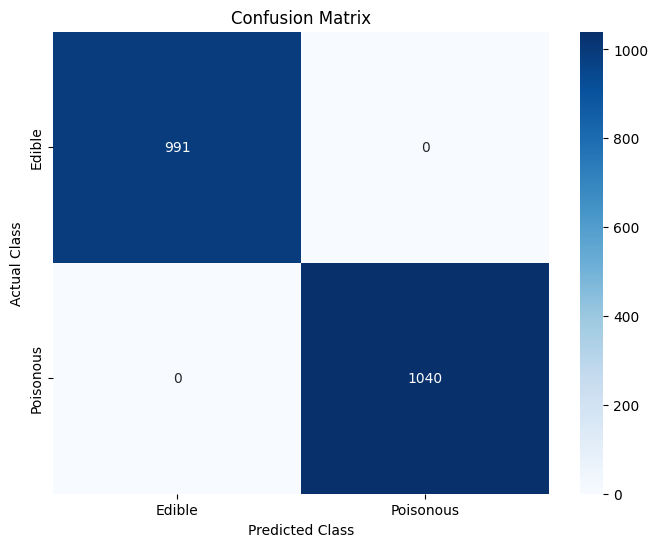

In [ ]:
# Creating the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap='Blues', xticklabels=['Edible', 'Poisonous'], yticklabels=['Edible', 'Poisonous'])
plt.title('Confusion Matrix')
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
plt.show()

**#6. Create a visualization of the decision tree.**

In [ ]:
from sklearn import tree

[Text(0.5882352941176471, 0.9375, 'x[27] <= 0.5\ngini = 0.499\nsamples = 6093\nvalue = [2925, 3168]'),
 Text(0.35294117647058826, 0.8125, 'x[53] <= 0.5\ngini = 0.284\nsamples = 3421\nvalue = [2835, 586]'),
 Text(0.23529411764705882, 0.6875, 'x[63] <= 0.5\ngini = 0.128\nsamples = 3013\nvalue = [2806, 207]'),
 Text(0.17647058823529413, 0.5625, 'x[25] <= 0.5\ngini = 0.044\nsamples = 2871\nvalue = [2806, 65]'),
 Text(0.11764705882352941, 0.4375, 'x[22] <= 0.5\ngini = 0.022\nsamples = 2838\nvalue = [2806, 32]'),
 Text(0.058823529411764705, 0.3125, 'gini = 0.0\nsamples = 2806\nvalue = [2806, 0]'),
 Text(0.17647058823529413, 0.3125, 'gini = 0.0\nsamples = 32\nvalue = [0, 32]'),
 Text(0.23529411764705882, 0.4375, 'gini = 0.0\nsamples = 33\nvalue = [0, 33]'),
 Text(0.29411764705882354, 0.5625, 'gini = 0.0\nsamples = 142\nvalue = [0, 142]'),
 Text(0.47058823529411764, 0.6875, 'x[105] <= 0.5\ngini = 0.132\nsamples = 408\nvalue = [29, 379]'),
 Text(0.4117647058823529, 0.5625, 'gini = 0.0\nsamples 

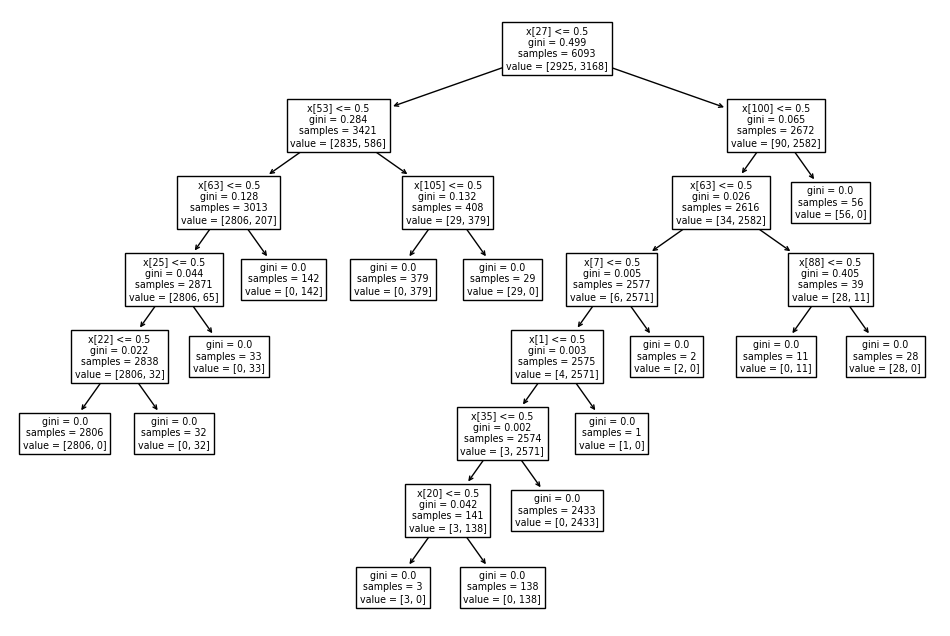

In [ ]:
# plotting the tree
plt.figure(figsize=(12,8))

tree.plot_tree(dt_classifier.fit(X_train, y_train))

**#7. Use a χ2-statistic selector to pick the five best features for this data (see section 10.4 of the Machine Learning with Python Cookbook).**

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2

# Using chi-squared statistic to select the top 5 features
chi2_selector = SelectKBest(chi2, k=5)
X_kbest = chi2_selector.fit_transform(X, y)

# Get the selected feature indices
selected_indices = chi2_selector.get_support(indices=True)
selected_feature_names = X.columns[selected_indices]

selected_feature_names.tolist()

['odor_f',
 'odor_n',
 'gill-color_b',
 'stalk-surface-above-ring_k',
 'stalk-surface-below-ring_k']

**#8. Which five features were selected in step 7? Hint: use the get_support function.**

The five best features selected for this data are:

1. odor_f
2. odor_n
3. gill-color_b
4. stalk-surface-above-ring_k
5. stalk-surface-below-ring_k

These features are considered the most significant in terms of their relationship with the target variable in the dataset.

**#9. Repeat steps 4 and 5 with the five best features selected in Step 7**

In [ ]:
# Creating a new model using only the selected features
X_train_selected = X_train[selected_feature_names]
X_test_selected = X_test[selected_feature_names]

# Initialize a new Decision Tree Classifier
dt_classifier_selected = DecisionTreeClassifier(random_state=42)

# Fit the classifier on the training data with selected features
dt_classifier_selected.fit(X_train_selected, y_train)

# Making predictions on the test set with selected features
y_pred_selected = dt_classifier_selected.predict(X_test_selected)

# Calculating the accuracy with the selected features
accuracy_selected = accuracy_score(y_test, y_pred_selected)
accuracy_selected


0.9266371245691778

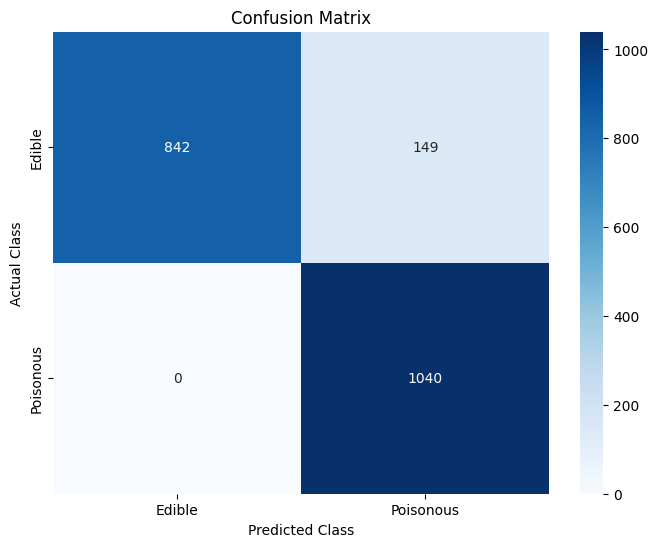

In [ ]:
# Creating the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_selected)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap='Blues', xticklabels=['Edible', 'Poisonous'], yticklabels=['Edible', 'Poisonous'])
plt.title('Confusion Matrix')
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
plt.show()

**#10. Summarize your findings**

Using only the five best features, the Decision Tree Classifier achieved an accuracy score of 93%.

The accuracy is lower than the 100% accuracy of the full dataset, but its still pretty high considering all of the columns that were removed. This suggests that these five features are strong predictors for the classification of edible and non-edible mushbrooms.